In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
from openpyxl.utils.dataframe import dataframe_to_rows
import os
#import xlwt
from openpyxl import load_workbook
import time
import scipy
import math
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.signal import savgol_filter #Smooth

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 10,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

In [3]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO

In [4]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


In [5]:
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

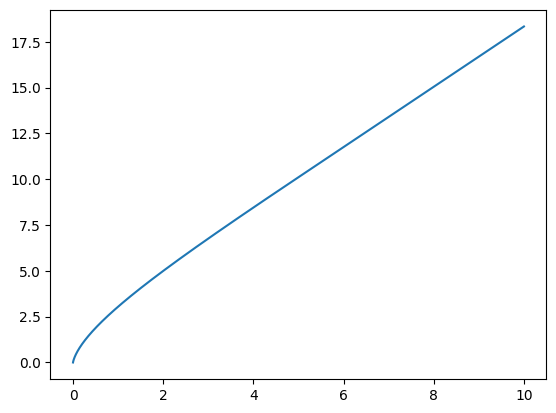

In [6]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

In [7]:
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    return Bin_center, hist

In [22]:
data_AmBe=[]
for i in np.arange(1,32,1):
    if i ==1:
        data_AmBe = np.loadtxt("../../../../data/NSTOF_simulation_AmBe/Output_exp_simulation_flat_source_60deg_4E9/202302_EJ309_N_scatter_11MeV_4E9_All_in_one_Flat_spectrum_"+str(int(i))+".txt")
    else:
        data_AmBe_temp = np.loadtxt("../../../../data/NSTOF_simulation_AmBe/Output_exp_simulation_flat_source_60deg_4E9/202302_EJ309_N_scatter_11MeV_4E9_All_in_one_Flat_spectrum_"+str(int(i))+".txt")
        data_AmBe = np.vstack((data_AmBe,data_AmBe_temp))
        #print(data_6MeV.shape)

In [23]:
print("Core||","counts||", "Lightoutput in trigger||","proton_energy intrigger||" ,"neutron_energy on surface||" ,"LO_in_n_detector||")
data_AmBe = pd.DataFrame(data_AmBe,columns=["Core","counts","Tri_LO","Tri_P_E","N_E_surface","Rec_LO"])

print(data_AmBe)
print(data_AmBe.shape)


Core|| counts|| Lightoutput in trigger|| proton_energy intrigger|| neutron_energy on surface|| LO_in_n_detector||
       Core  counts    Tri_LO   Tri_P_E  N_E_surface    Rec_LO
0       1.0     1.0  0.003749  0.052017     1.356940  0.103188
1       1.0     2.0  0.632416  2.214620     2.810400  0.466016
2       1.0     3.0  0.161513  0.860590     1.968990  0.298008
3       1.0     4.0  0.239213  1.405380     0.011095  0.000265
4       1.0     5.0  0.690830  2.354100     2.111540  0.042817
...     ...     ...       ...       ...          ...       ...
77903  31.0  2565.0  0.869842  2.762290     4.719820  0.038362
77904  31.0  2566.0  0.677380  2.457730     1.334230  0.008168
77905  31.0  2567.0  0.151228  0.983133     0.515671  0.022354
77906  31.0  2568.0  0.086773  0.553715     2.502380  0.491556
77907  31.0  2569.0  1.834080  4.689110     2.655820  0.498161

[77908 rows x 6 columns]
(77908, 6)


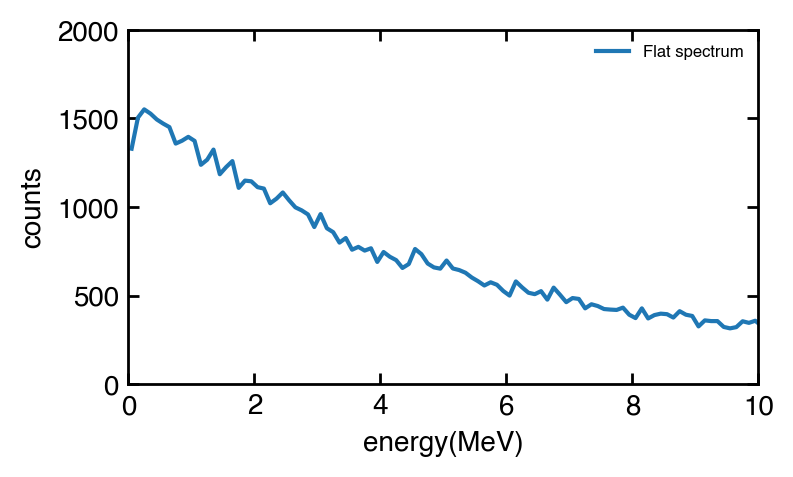

In [24]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
axis,y_AmBe=sorting(data_AmBe['Tri_P_E']+data_AmBe['N_E_surface'],120,0,12)
plt.plot(axis,y_AmBe,label="Flat spectrum")

fig_post_def(xlim=(0,10),ylim=(0,2000),xlabel="energy(MeV)",ylabel="counts")


In [25]:

data_AmBe_LO = data_AmBe.copy(deep=True)
data_AmBe_LO["LO_to_E"] = data_AmBe_LO["Tri_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
print(data_AmBe_LO.head())


   Core  counts    Tri_LO   Tri_P_E  N_E_surface    Rec_LO   LO_to_E
0   1.0     1.0  0.003749  0.052017     1.356940  0.103188  0.051919
1   1.0     2.0  0.632416  2.214620     2.810400  0.466016  2.214609
2   1.0     3.0  0.161513  0.860590     1.968990  0.298008  0.860581
3   1.0     4.0  0.239213  1.405380     0.011095  0.000265  1.131965
4   1.0     5.0  0.690830  2.354100     2.111540  0.042817  2.354104


In [26]:
"""data_AmBe_LO=[]
for i in np.arange(0,len(data_AmBe[:,2]),1):
    index = int(data_AmBe[i,2]*100000)
    data_LO_temp = np.append(data_AmBe[i,:],P_Energy_inter[index])
    if i ==0: data_AmBe_LO = data_LO_temp.copy()
    else:     data_AmBe_LO = np.vstack((data_AmBe_LO,data_LO_temp))"""

'data_AmBe_LO=[]\nfor i in np.arange(0,len(data_AmBe[:,2]),1):\n    index = int(data_AmBe[i,2]*100000)\n    data_LO_temp = np.append(data_AmBe[i,:],P_Energy_inter[index])\n    if i ==0: data_AmBe_LO = data_LO_temp.copy()\n    else:     data_AmBe_LO = np.vstack((data_AmBe_LO,data_LO_temp))'

In [27]:
print(data_AmBe_LO)

       Core  counts    Tri_LO   Tri_P_E  N_E_surface    Rec_LO   LO_to_E
0       1.0     1.0  0.003749  0.052017     1.356940  0.103188  0.051919
1       1.0     2.0  0.632416  2.214620     2.810400  0.466016  2.214609
2       1.0     3.0  0.161513  0.860590     1.968990  0.298008  0.860581
3       1.0     4.0  0.239213  1.405380     0.011095  0.000265  1.131965
4       1.0     5.0  0.690830  2.354100     2.111540  0.042817  2.354104
...     ...     ...       ...       ...          ...       ...       ...
77903  31.0  2565.0  0.869842  2.762290     4.719820  0.038362  2.762286
77904  31.0  2566.0  0.677380  2.457730     1.334230  0.008168  2.322301
77905  31.0  2567.0  0.151228  0.983133     0.515671  0.022354  0.821678
77906  31.0  2568.0  0.086773  0.553715     2.502380  0.491556  0.553699
77907  31.0  2569.0  1.834080  4.689110     2.655820  0.498161  4.689110

[77908 rows x 7 columns]


In [88]:
mask_Tri_LO=data_AmBe_LO['Tri_LO']>0.2
mask_Rec_LO=data_AmBe_LO['Rec_LO']>0.4
data_AmBe_LO_Th = data_AmBe_LO[(mask_Tri_LO&mask_Rec_LO)]

In [93]:
shape_edge_x = np.array([0,1,2,3,4,5,6,7,8,9,10,11,11])
shape_edge_y = np.array([100]*12+[0])

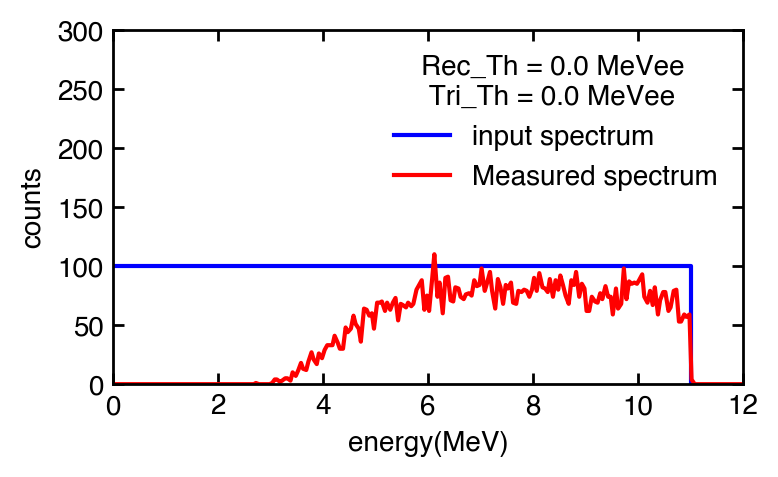

In [94]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe_LO_Th['LO_to_E']+data_AmBe_LO_Th['N_E_surface'],240,0,12)


plt.plot(shape_edge_x,shape_edge_y,'b' ,label = 'input spectrum')
plt.plot(axis,y_AmBe,'r',label="Measured spectrum")

fig_post_def(xlim=(0,12),ylim=(0,300),lg_fs = 10,title ='Rec_Th = 0.0 MeVee \n Tri_Th = 0.0 MeVee  ',xlabel="energy(MeV)",ylabel="counts")



In [95]:
y_AmBe/2*10**9

array([0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       5.00e+08, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
       5.00e+08, 2.00e+09, 2.00e+09, 1.00e+09, 1.50e+09, 2.50e+09,
       2.50e+09, 1.50e+09, 5.00e+09, 3.50e+09, 6.00e+09, 9.00e+09,
       6.50e+09, 6.00e+09, 9.50e+09, 1.35e+10, 1.05e+10, 8.50e+09,
       1.30e+10, 1.10e+10, 1.45e+10, 1.65e+10, 1.65e+10, 1.65e+10,
       2.05e+10, 1.75e+10, 1.50e+10, 1.50e+10, 2.40e+10, 2.20e

In [57]:
print(sum(y_AmBe))

16135


In [58]:
np.savetxt("flat_specturm_efficiency.txt",y_AmBe)

In [17]:
output_AmBe_simulation = axis[:,np.newaxis]
output_AmBe_simulation = np.column_stack((output_AmBe_simulation,y_AmBe[:,np.newaxis]))

In [18]:
np.savetxt(".txt",output_AmBe_simulation)

In [22]:
data_AmBe_LO_selected_t = data_AmBe_LO[data_AmBe_LO[:,2]>0.1]
data_AmBe_LO_selected = data_AmBe_LO_selected_t[data_AmBe_LO_selected_t['']>0.3]

TypeError: '(slice(None, None, None), 2)' is an invalid key

NameError: name 'data_AmBe_LO_selected' is not defined

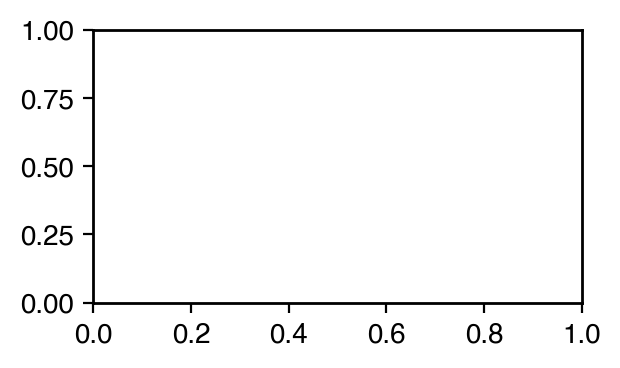

In [23]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_AmBe=sorting(data_AmBe_LO_selected[:,6]+data_AmBe_LO_selected[:,4],120,0,12)

plt.plot(axis,y_AmBe,label="AmBe")

fig_post_def(xlim=(0,12),ylim=(0,500),xlabel="energy(MeV)",ylabel="counts")



In [20]:
output_AmBe_simulation = axis[:,np.newaxis]
output_AmBe_simulation = np.column_stack((output_AmBe_simulation,y_AmBe[:,np.newaxis]))

In [21]:
np.savetxt("Simulated_N_TOF.txt",output_AmBe_simulation)

# Trigger and LO comparison

In [111]:
data_3MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_3MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
    else:
        data_3MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_3.0MeV_"+str(int(i))+".txt")
        data_3MeV = np.vstack((data_3MeV,data_3MeV_temp))

In [11]:
data_4MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_4MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
    else:
        data_4MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_4.0MeV_"+str(int(i))+".txt")
        data_4MeV = np.vstack((data_4MeV,data_4MeV_temp))

In [15]:
data_5MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_5MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
    else:
        data_5MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_5.0MeV_"+str(int(i))+".txt")
        data_5MeV = np.vstack((data_5MeV,data_5MeV_temp))

In [22]:
data_6MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_6MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
    else:
        data_6MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_6.0MeV_"+str(int(i))+".txt")
        data_6MeV = np.vstack((data_6MeV,data_6MeV_temp))

In [29]:
data_7MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_7MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
    else:
        data_7MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_7.0MeV_"+str(int(i))+".txt")
        data_7MeV = np.vstack((data_7MeV,data_7MeV_temp))

In [59]:
data_8MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_8MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
    else:
        data_8MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_8.0MeV_"+str(int(i))+".txt")
        data_8MeV = np.vstack((data_8MeV,data_8MeV_temp))

In [86]:
data_9MeV=[]
for i in np.arange(0,30,1):
    if i ==0:
        data_9MeV = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
    else:
        data_9MeV_temp = np.loadtxt("data/202210_EJ309_N_scatter_exp_All_in_one_9.0MeV_"+str(int(i))+".txt")
        data_9MeV = np.vstack((data_9MeV,data_9MeV_temp))

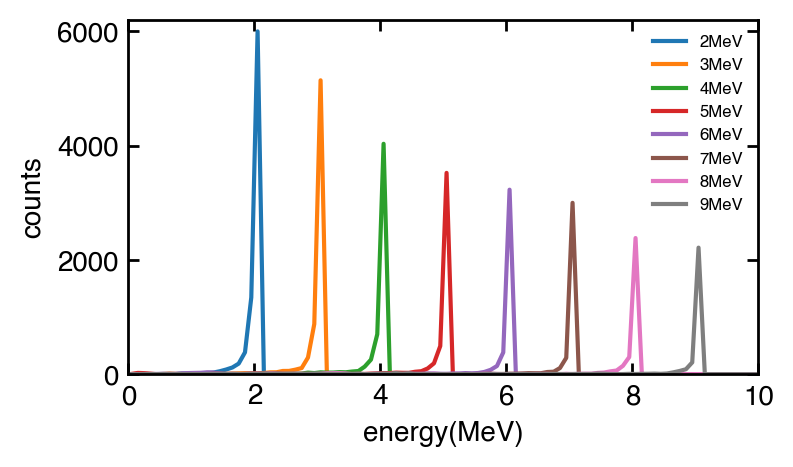

In [91]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3]+data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3]+data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3]+data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3]+data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3]+data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3]+data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3]+data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3]+data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,6200),xlabel="energy(MeV)",ylabel="counts")

In [71]:
P_Energy_inter[9041]

0.5702714291205089

In [74]:
data_2MeV_LO=[]
for i in np.arange(0,len(data_2MeV[:,2]),1):
    index = int(data_2MeV[i,2]*100000)
    data_LO_temp = np.append(data_2MeV[i,:],P_Energy_inter[index])
    if i ==0: data_2MeV_LO = data_LO_temp.copy()
    else:     data_2MeV_LO = np.vstack((data_2MeV_LO,data_LO_temp))

In [75]:
data_3MeV_LO=[]
for i in np.arange(0,len(data_3MeV[:,2]),1):
    index = int(data_3MeV[i,2]*100000)
    data_LO_temp = np.append(data_3MeV[i,:],P_Energy_inter[index])
    if i ==0: data_3MeV_LO = data_LO_temp.copy()
    else:     data_3MeV_LO = np.vstack((data_3MeV_LO,data_LO_temp))

In [76]:
data_4MeV_LO=[]
for i in np.arange(0,len(data_4MeV[:,2]),1):
    index = int(data_4MeV[i,2]*100000)
    data_LO_temp = np.append(data_4MeV[i,:],P_Energy_inter[index])
    if i ==0: data_4MeV_LO = data_LO_temp.copy()
    else:     data_4MeV_LO = np.vstack((data_4MeV_LO,data_LO_temp))

In [77]:
data_5MeV_LO=[]
for i in np.arange(0,len(data_5MeV[:,2]),1):
    index = int(data_5MeV[i,2]*100000)
    data_LO_temp = np.append(data_5MeV[i,:],P_Energy_inter[index])
    if i ==0: data_5MeV_LO = data_LO_temp.copy()
    else:     data_5MeV_LO = np.vstack((data_5MeV_LO,data_LO_temp))

In [78]:
data_6MeV_LO=[]
for i in np.arange(0,len(data_6MeV[:,2]),1):
    index = int(data_6MeV[i,2]*100000)
    data_LO_temp = np.append(data_6MeV[i,:],P_Energy_inter[index])
    if i ==0: data_6MeV_LO = data_LO_temp.copy()
    else:     data_6MeV_LO = np.vstack((data_6MeV_LO,data_LO_temp))

In [79]:
data_7MeV_LO=[]
for i in np.arange(0,len(data_7MeV[:,2]),1):
    index = int(data_7MeV[i,2]*100000)
    data_LO_temp = np.append(data_7MeV[i,:],P_Energy_inter[index])
    if i ==0: data_7MeV_LO = data_LO_temp.copy()
    else:     data_7MeV_LO = np.vstack((data_7MeV_LO,data_LO_temp))

In [80]:
data_8MeV_LO=[]
for i in np.arange(0,len(data_8MeV[:,2]),1):
    index = int(data_8MeV[i,2]*100000)
    data_LO_temp = np.append(data_8MeV[i,:],P_Energy_inter[index])
    if i ==0: data_8MeV_LO = data_LO_temp.copy()
    else:     data_8MeV_LO = np.vstack((data_8MeV_LO,data_LO_temp))

In [88]:
data_9MeV_LO=[]
for i in np.arange(0,len(data_9MeV[:,2]),1):
    index = int(data_9MeV[i,2]*100000)
    data_LO_temp = np.append(data_9MeV[i,:],P_Energy_inter[index])
    if i ==0: data_9MeV_LO = data_LO_temp.copy()
    else:     data_9MeV_LO = np.vstack((data_9MeV_LO,data_LO_temp))

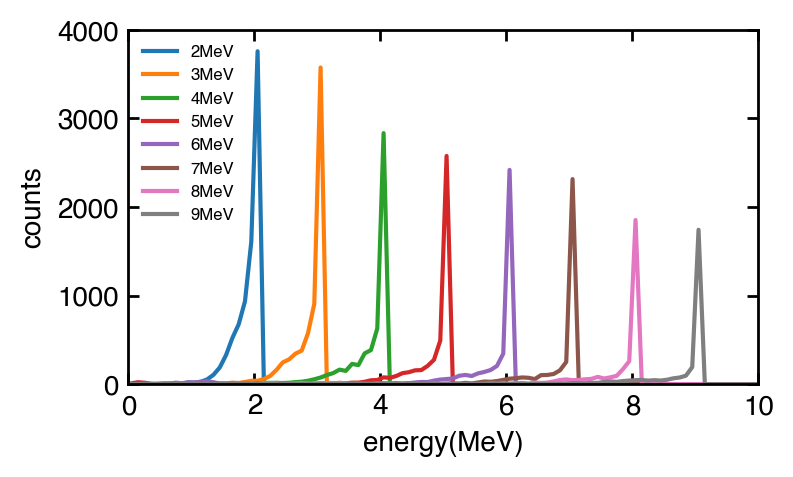

In [93]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格


axis,y_2MeV=sorting(data_2MeV_LO[:,6]+data_2MeV_LO[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV_LO[:,6]+data_3MeV_LO[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV_LO[:,6]+data_4MeV_LO[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV_LO[:,6]+data_5MeV_LO[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV_LO[:,6]+data_6MeV_LO[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV_LO[:,6]+data_7MeV_LO[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV_LO[:,6]+data_8MeV_LO[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV_LO[:,6]+data_9MeV_LO[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(0,4000),xlabel="energy(MeV)",ylabel="counts")



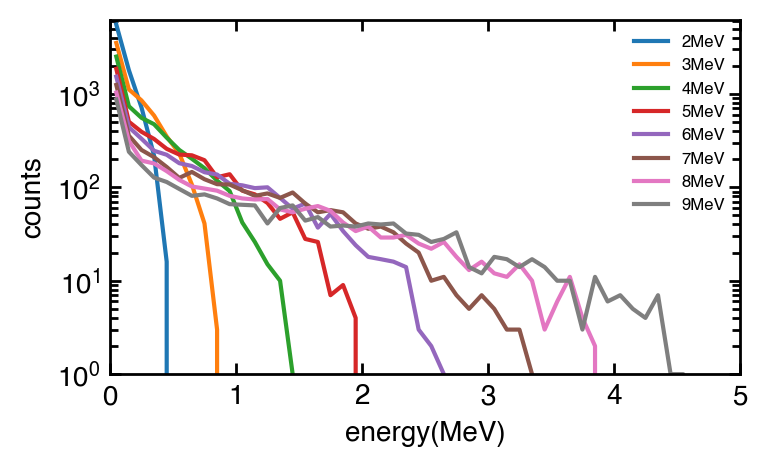

In [100]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,5],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,5],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,5],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,5],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,5],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,5],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,5],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,5],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,5),ylim=(1,6200),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

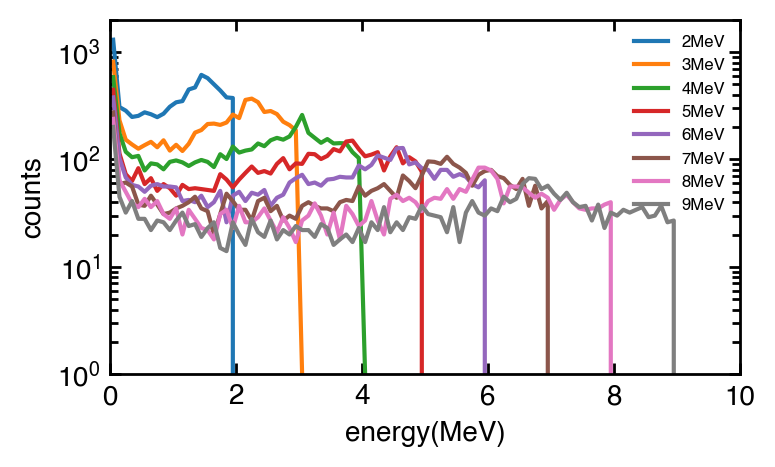

In [98]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,4],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,4],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,4],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,4],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,4],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,4],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,4],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,4],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")

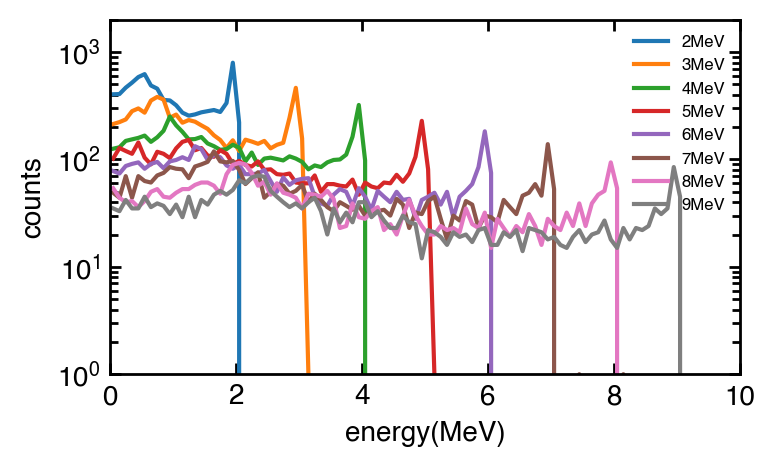

In [103]:
fig = fig_pre_def(8,4.5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

axis,y_2MeV=sorting(data_2MeV[:,3],100,0,10)
axis,y_3MeV=sorting(data_3MeV[:,3],100,0,10)
axis,y_4MeV=sorting(data_4MeV[:,3],100,0,10)
axis,y_5MeV=sorting(data_5MeV[:,3],100,0,10)
axis,y_6MeV=sorting(data_6MeV[:,3],100,0,10)
axis,y_7MeV=sorting(data_7MeV[:,3],100,0,10)
axis,y_8MeV=sorting(data_8MeV[:,3],100,0,10)
axis,y_9MeV=sorting(data_9MeV[:,3],100,0,10)
plt.plot(axis,y_2MeV,label="2MeV")
plt.plot(axis,y_3MeV,label="3MeV")
plt.plot(axis,y_4MeV,label="4MeV")
plt.plot(axis,y_5MeV,label="5MeV")
plt.plot(axis,y_6MeV,label="6MeV")
plt.plot(axis,y_7MeV,label="7MeV")
plt.plot(axis,y_8MeV,label="8MeV")
plt.plot(axis,y_9MeV,label="9MeV")
fig_post_def(xlim=(0,10),ylim=(1,2000),xlabel="energy(MeV)",ylabel="counts")
plt.yscale("log")